### Gradient Descent_2D
- 차원이 여러 개일 때 gradient descent 알고리즘을 쓰려면 partial derivative를 구해야 한다!
- Derivative: 변수가 1개일 때의 미분값
- Gradient: 변수가 2개 이상일 때 partial derivative 값들의 배열
- Note that now the local min is (x, y)!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\minji\AppData\Local\Temp/ipykernel_19548/410611610.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


### Gradient descent in 2D

In [8]:
def peaks(x, y):
    # expand to a 2D mesh
    # take N-sized 1d-array to create N x N 2d-array (grid)
    x, y = np.meshgrid(x, y)
    
    z = 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) \
        - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2) \
        - 1/3*np.exp(-(x+1)**2 - y**2)
    return z

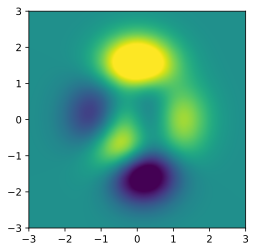

In [3]:
# create the landscape
x = np.linspace(-3, 3, 201)
y = np.linspace(-3, 3, 201)

Z = peaks(x, y) # grid of ordinates

plt.imshow(Z, extent=[x[0], x[-1], y[0], y[-1]], vmin=-5, vmax=5, origin='lower')
plt.show()

In [12]:
sx, sy = sym.symbols('sx,sy')

sZ = 3*(1-sx)**2 * sym.exp(-(sx**2) - (sy+1)**2) \
    - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2-sy**2) \
    - 1/3*sym.exp(-(sx+1)**2 - sy**2)

# create functions from the sympy-computed derivatives (symbolic object)
df_x = sym.lambdify((sx, sy), sym.diff(sZ, sx), 'sympy')
df_y = sym.lambdify((sx, sy), sym.diff(sZ, sy), 'sympy')

df_x(1, 1).evalf()

-1.07369833656079

In [17]:
# random starting point (uniform between -2 and +2)
localmin = np.random.rand(2)*4-2 # rand()는 0-1 사이 균일분포값 중 하나 반환
startpnt = localmin[:] # make a copy

learning_rate = .01
training_epochs = 1000

trajectory = np.zeros((training_epochs, 2)) # 각 column은 x, y값용
for i in range(training_epochs):
    grad = np.array([
        df_x(localmin[0], localmin[1]).evalf(),
        df_y(localmin[0], localmin[1]).evalf()
    ])
    localmin = localmin - learning_rate*grad # (,2)-sized vector
    trajectory[i,:] = localmin
    
print(localmin)
print(startpnt)

[-1.34739624436821 0.204518866097005]
[-1.9967286   1.82455129]


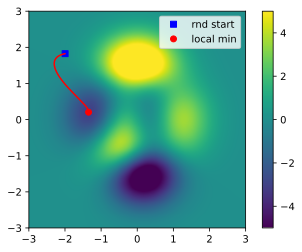

In [18]:
plt.imshow(Z, extent=[x[0], x[-1], y[0], y[-1]], vmin=-5, vmax=5, origin='lower')
plt.plot(startpnt[0], startpnt[1], 'bs')
plt.plot(localmin[0], localmin[1], 'ro')
plt.plot(trajectory[:,0], trajectory[:,1], 'r')
plt.legend(['rnd start', 'local min'])
plt.colorbar()
plt.show()

### Additional explorations

In [20]:
# 1) Modify the code to force the initial guess to be [0, 1.4].
# Does the model reach a reasonable local minimum?
#
# 2) Using the same starting point, change the number of training epochs to 10,000.
# Does the final solution differ from using 1000 epochs?
#
# 3) (Again with the same starting location) Change the learning rate to .1 (1000 epochs).
# What do you notice about the trajectory?
# Try again with the learning rate set to .5, and then to .00001.

1) Modify the code to force the initial guess to be [0, 1.4].  
Does the model reach a reasonable local minimum?

In [21]:
# random starting point (uniform between -2 and +2)
localmin = np.array([0, 1.4])
startpnt = localmin[:] # make a copy

learning_rate = .01
training_epochs = 1000

trajectory = np.zeros((training_epochs, 2)) # 각 column은 x, y값용
for i in range(training_epochs):
    grad = np.array([
        df_x(localmin[0], localmin[1]).evalf(),
        df_y(localmin[0], localmin[1]).evalf()
    ])
    localmin = localmin - learning_rate*grad # (1, 2)-sized array
    trajectory[i,:] = localmin
    
print(localmin)
print(startpnt)

[0.296445553846832 0.320196247666835]
[0.  1.4]


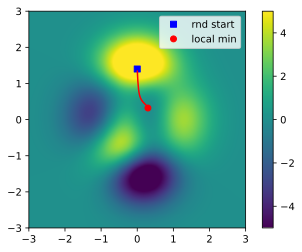

In [22]:
plt.imshow(Z, extent=[x[0], x[-1], y[0], y[-1]], vmin=-5, vmax=5, origin='lower')
plt.plot(startpnt[0], startpnt[1], 'bs')
plt.plot(localmin[0], localmin[1], 'ro')
plt.plot(trajectory[:,0], trajectory[:,1], 'r')
plt.legend(['rnd start', 'local min'])
plt.colorbar()
plt.show()

In [23]:
### Answer
# 가장 거리가 가까운 local minimum으로 가기는 하였으나,
# global minimum에 도달하지는 못했다.

2) Using the same starting point, change the number of training epochs to 10,000.  
Does the final solution differ from using 1000 epochs?

In [25]:
# random starting point (uniform between -2 and +2)
localmin = np.array([0, 1.4])
startpnt = localmin[:] # make a copy

learning_rate = .01
training_epochs = 10000

trajectory = np.zeros((training_epochs, 2)) # 각 column은 x, y값용
for i in range(training_epochs):
    grad = np.array([
        df_x(localmin[0], localmin[1]).evalf(),
        df_y(localmin[0], localmin[1]).evalf()
    ])
    localmin = localmin - learning_rate*grad # (1, 2)-sized array
    trajectory[i,:] = localmin
    
print(localmin)
print(startpnt)

[0.296445553846832 0.320196247666835]
[0.  1.4]


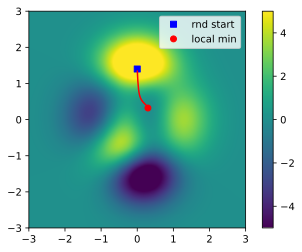

In [26]:
plt.imshow(Z, extent=[x[0], x[-1], y[0], y[-1]], vmin=-5, vmax=5, origin='lower')
plt.plot(startpnt[0], startpnt[1], 'bs')
plt.plot(localmin[0], localmin[1], 'ro')
plt.plot(trajectory[:,0], trajectory[:,1], 'r')
plt.legend(['rnd start', 'local min'])
plt.colorbar()
plt.show()

In [27]:
### Answer
# 동일한 local minimum에 도달하였고, training epochs 수가 결과에 영향을 미치지 않았다.
# local minimum은 주변 위치보다 상대적으로 낮은 지점에 위치해 있을 것이고,
# learning_rate 값이 매우 크지 않은 이상 saddle point에서 빠져나오기는 힘들 것이다.

3) Change the learning rate to .1 (1000 epochs).  
What do you notice about the trajectory?  
Try again with the learning rate set to .5, and then to .00001.

In [31]:
def train(learning_rate):
    # random starting point (uniform between -2 and +2)
    localmin = np.array([0, 1.4])
    startpnt = localmin[:] # make a copy

    # learning_rate = .01
    training_epochs = 1000

    trajectory = np.zeros((training_epochs, 2)) # 각 column은 x, y값용
    for i in range(training_epochs):
        grad = np.array([
            df_x(localmin[0], localmin[1]).evalf(),
            df_y(localmin[0], localmin[1]).evalf()
        ])
        localmin = localmin - learning_rate*grad # (1, 2)-sized array
        trajectory[i,:] = localmin
        
    print(localmin)
    print(startpnt)
    
    return trajectory, localmin, startpnt

[0.296445553846832 0.320196247666834]
[0.  1.4]


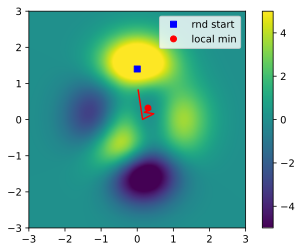

In [32]:
trajectory, localmin, startpnt = train(0.1)

plt.imshow(Z, extent=[x[0], x[-1], y[0], y[-1]], vmin=-5, vmax=5, origin='lower')
plt.plot(startpnt[0], startpnt[1], 'bs')
plt.plot(localmin[0], localmin[1], 'ro')
plt.plot(trajectory[:,0], trajectory[:,1], 'r')
plt.legend(['rnd start', 'local min'])
plt.colorbar()
plt.show()

[-3.36495856797406 -2.35064217992983]
[0.  1.4]


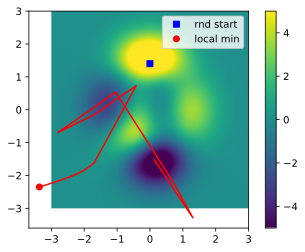

In [36]:
trajectory, localmin, startpnt = train(0.5)

plt.imshow(Z, extent=[x[0], x[-1], y[0], y[-1]], vmin=-5, vmax=5, origin='lower')
plt.plot(startpnt[0], startpnt[1], 'bs')
plt.plot(localmin[0], localmin[1], 'ro')
plt.plot(trajectory[:,0], trajectory[:,1], 'r')
plt.legend(['rnd start', 'local min'])
plt.colorbar()
plt.show()

In [38]:
startpnt, trajectory[:3,:] # 한 번에 global minimum 근처에 갔다가 다시 나옴

(array([0. , 1.4]),
 array([[ 0.13303878, -1.52355139],
        [ 1.30404189, -3.2848369 ],
        [ 1.28474259, -3.24939732]]))

[0.00314341526614904 1.33227970009077]
[0.  1.4]


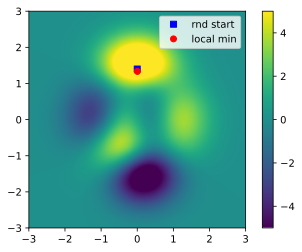

In [34]:
trajectory, localmin, startpnt = train(0.00001)

plt.imshow(Z, extent=[x[0], x[-1], y[0], y[-1]], vmin=-5, vmax=5, origin='lower')
plt.plot(startpnt[0], startpnt[1], 'bs')
plt.plot(localmin[0], localmin[1], 'ro')
plt.plot(trajectory[:,0], trajectory[:,1], 'r')
plt.legend(['rnd start', 'local min'])
plt.colorbar()
plt.show()

In [35]:
### Answer
# learning_rate는 직관적으로 '한 번에 움직일 걸음의 크기'를 의미한다.
# learning_rate가 작을수록 한 위치에서 벗어나지 못하고 고여있게 될 확률이 높다.
# 반대로, learning_rate가 큰 경우 local minimum 근처라 하더라도 learning_rate*grad의
# 값이 매우 커져 아예 다른 곳으로 이동해버릴 수 있기 때문에 saddle point에서 벗어날
# 가능성이 생긴다. 단, 반드시 global minimum으로 빠질 것이라고는 장담할 수 없다.